In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
urli = 'https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/refs/heads/master/SalesAnalysis/Sales_Data/Sales_'
urlf = '_2019.csv'

meses = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

todos_meses = pd.DataFrame()

for mes in meses:
    #print(urli + mes + urlf)
    df = pd.read_csv(urli + mes + urlf)
    todos_meses = pd.concat([todos_meses, df])


Limpar

In [14]:
#nan_df = todos_meses[todos_meses.isna().any(axis=1)]
#nan_df.head()

todos_meses = todos_meses.dropna(how='all')
#todos_meses.head()

In [17]:
tdf = todos_meses[todos_meses['Order Date'].str[0:2] == 'Or']
tdf.head()
todos_meses = todos_meses[todos_meses['Order Date'].str[0:2] != 'Or']

In [20]:
todos_meses['Quantity Ordered'] = pd.to_numeric(todos_meses['Quantity Ordered'])
todos_meses['Price Each'] = pd.to_numeric(todos_meses['Price Each'])

In [18]:
todos_meses['Mes'] = todos_meses['Order Date'].str[0:2]
todos_meses['Mes'] = todos_meses['Mes'].astype('int8')
todos_meses.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mes
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1


In [11]:
todos_meses['Mes'].unique()

array(['01', nan, 'Or', '02', '03', '04', '05', '06', '07', '08', '09',
       '10', '11', '12'], dtype=object)

sales coluna

In [22]:
todos_meses['Sales'] = todos_meses['Quantity Ordered'] * todos_meses['Price Each']
todos_meses.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mes,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99


In [26]:
todos_meses.groupby('Mes')['Sales'].sum()

,Sales
Mes,
1,1822256.73
2,2202022.42
3,2807100.38
4,3390670.24
5,3152606.75
6,2577802.26
7,2647775.76
8,2244467.88
9,2097560.13


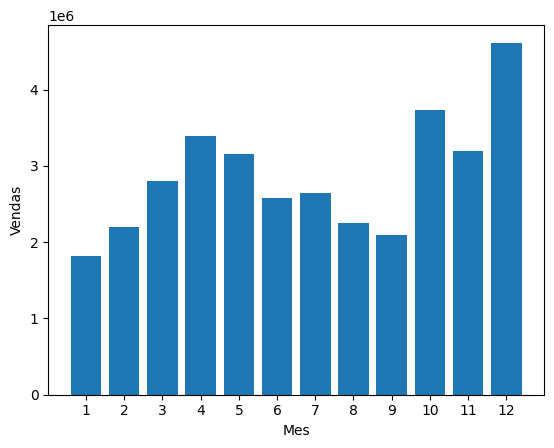

In [30]:
plt.bar(range(1, 13), todos_meses.groupby('Mes')['Sales'].sum())
plt.xticks(range(1, 13))
plt.xlabel('Mes')
plt.ylabel('Vendas')
plt.show()

In [69]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(" ")[1]

todos_meses['Cidade'] = todos_meses['Purchase Address'].apply(lambda x : get_city(x) + ' ' + get_state(x))

#todos_meses = todos_meses.drop(columns=['Estado Zip', 'Rua'])
#todos_meses.head()

#todos_meses['Purchase Address'].str.split(',', expand=True)
#todos_meses[['Rua', 'Cidade', 'Estado']] = todos_meses['Purchase Address'].str.split(',', expand=True)
#todos_meses.drop(columns='Pais', inplace=True)
todos_meses.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mes,Sales,Cidade
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston MA
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland OR
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco CA
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles CA
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin TX


In [71]:
results = todos_meses.groupby('Cidade').sum()
results.head()

Output hidden; open in https://colab.research.google.com to view.

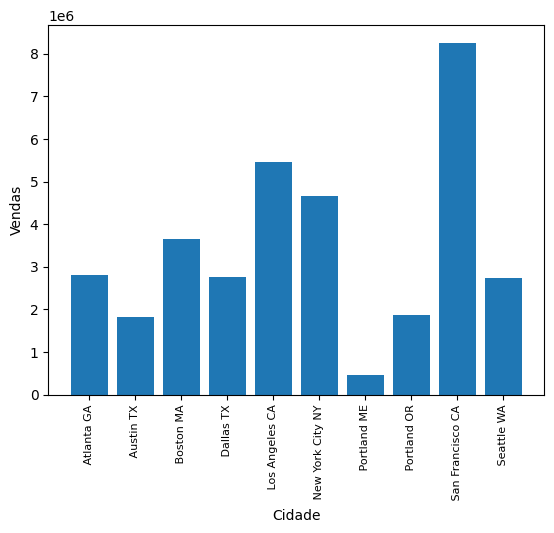

In [77]:
cidades = [cidade for cidade, df in todos_meses.groupby('Cidade')]
plt.bar(cidades, results['Sales'])
plt.xticks(rotation='vertical', size=8)
plt.xlabel('Cidade')
plt.ylabel('Vendas')
plt.show()


In [79]:
todos_meses['Order Date'] = pd.to_datetime(todos_meses['Order Date'])
#order_dates = pd.to_datetime(todos_meses['Order Date'])
#todos_meses['Hora'] = order_dates.dt.hour
#todos_meses['Minuto'] = order_dates.dt.minute
todos_meses.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mes,Sales,Cidade
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston MA
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland OR
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco CA
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles CA
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin TX


In [82]:
todos_meses['Hora'] = todos_meses['Order Date'].dt.hour
todos_meses['Minuto'] = todos_meses['Order Date'].dt.minute
todos_meses.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mes,Sales,Cidade,Hora,Minuto
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston MA,21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland OR,14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco CA,13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles CA,20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin TX,11,59


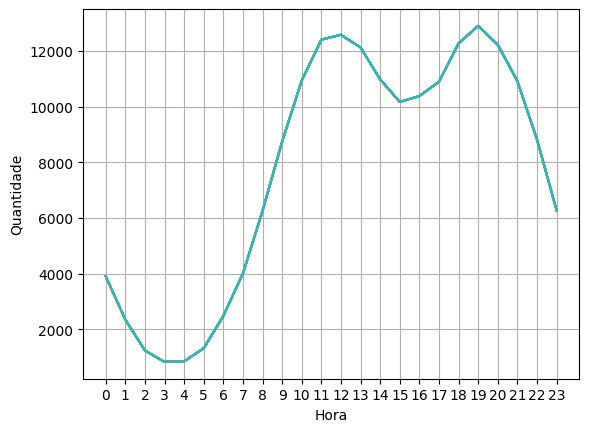

In [83]:
horas = [hora for hora, df in todos_meses.groupby('Hora')]
plt.plot(horas, todos_meses.groupby(['Hora']).count())
plt.xticks(horas)
plt.xlabel('Hora')
plt.ylabel('Quantidade')
plt.grid()
plt.show()

In [84]:
todos_meses.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mes,Sales,Cidade,Hora,Minuto
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston MA,21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland OR,14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco CA,13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles CA,20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin TX,11,59


In [85]:
df = todos_meses[todos_meses['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()
df2.head()

<ipython-input-85-2606a4a9bcff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"


In [86]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]